<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-TelecomX_parte2-/blob/main/ONE_TelecomX_BR_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Telecom X - Análise de Evasão de Clientes - Parte 2


🎯 Missão

A missão desse trabalho é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

🧠 Objetivos do Desafio

   1. Preparar os dados para a modelagem (tratamento, encoding, normalização).

   2. Realizar análise de correlação e seleção de variáveis.

   3. Treinar dois ou mais modelos de classificação.

   4. Avaliar o desempenho dos modelos com métricas.

   5. Interpretar os resultados, incluindo a importância das variáveis.

   6. Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

🧰 Ferramentas:

  - Google Colab
  - Python
  - Pandas
  - Scikit-Learn
  - MatplotLib
  - Seaborn
  

# Material de apoio:

### Dicionário de dados original

  

    customerID: número de identificação único de cada cliente
    Churn: se o cliente deixou ou não a empresa
    gender: gênero (masculino e feminino)
    SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
    Partner: se o cliente possui ou não um parceiro ou parceira
    Dependents: se o cliente possui ou não dependentes
    tenure: meses de contrato do cliente
    PhoneService: assinatura de serviço telefônico
    MultipleLines: assisnatura de mais de uma linha de telefone
    InternetService: assinatura de um provedor internet
    OnlineSecurity: assinatura adicional de segurança online
    OnlineBackup: assinatura adicional de backup online
    DeviceProtection: assinatura adicional de proteção no dispositivo
    TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
    StreamingTV: assinatura de TV a cabo
    StreamingMovies: assinatura de streaming de filmes
    Contract: tipo de contrato
    PaperlessBilling: se o cliente prefere receber online a fatura
    PaymentMethod: forma de pagamento
    Charges.Monthly: total de todos os serviços do cliente por mês
    Charges.Total: total gasto pelo cliente


Novo Dicionário de dados

- ID_Cliente (customerID): número de identificação único de cada cliente
- Churn (Churn): se o cliente deixou ou não a empresa
- Genero (gender): gênero (masculino e feminino)
- Idoso (SeniorCitizen): informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- Casal (Partner): se o cliente possui ou não um parceiro ou parceira
- Dependentes (Dependents): se o cliente possui ou não dependentes
- Tempo_Contrato (tenure): meses de contrato do cliente
- Servico_Telefone (PhoneService): assinatura de serviço telefônico
- Servico_MultiplasLinhas (MultipleLines): assinatura de mais de uma linha de telefone
- Servico_Internet (InternetService): assinatura de um provedor internet
- Opt_OnlineSecurity (OnlineSecurity): assinatura adicional de segurança online
- Opt_OnlineBackup (OnlineBackup): assinatura adicional de backup online
- Opt_DeviceProtection (DeviceProtection): assinatura adicional de proteção no dispositivo
- Opt_TechSupport (TechSupport): assinatura adicional de suporte técnico, menos tempo de espera
- Opt_StreamingTV (StreamingTV): assinatura de TV a cabo
- Opt_StreamingMovies (StreamingMovies): assinatura de streaming de filmes
- Tipo_Contrato (Contract): tipo de contrato
- FaturaOnline (PaperlessBilling): se o cliente prefere receber online a fatura
- Forma_Pagto (PaymentMethod): forma de pagamento
- Conta_Mensal (Charges.Monthly): total de todos os serviços do cliente por mês
- Conta_Diarias (N/A): total de todos os serviços do cliente por mês
- Conta_Total (Charges.Total): total gasto pelo cliente


## Preparação do ambiente:

In [1]:
# Importação de Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import os

In [2]:
#Criar a estrutura de diretórios para a armazenar os dados
!mkdir -p data
!mkdir -p data/bronze
!mkdir -p data/prata
!mkdir -p data/ouro
!mkdir -p data/Images

In [3]:
url ='https://raw.githubusercontent.com/mauricioaalmeida/ONE-TelecomX/refs/heads/main/data/prata/TelecomX_Data.parquet'
r = requests.get(url)
with open('data/prata/TelecomX_Data.parquet', 'wb') as f:
    f.write(r.content)

#🎲 1. Preparar os dados para a modelagem (tratamento, encoding, normalização).

### Carga dos dados

In [4]:
#Iniciando com o arquivo Parquet salvo na camada prata:
df = pd.read_parquet('data/prata/TelecomX_Data.parquet')


### Analise de Features

In [5]:
df.head()

,ID_Cliente,Churn,Genero,Idoso,Casal,Dependentes,Tempo_Contrato,Servico_Telefone,Servico_MultiplasLinhas,Servico_Internet,...,Opt_DeviceProtection,Opt_TechSupport,Opt_StreamingTV,Opt_StreamingMovies,Tipo_Contrato,FaturaOnline,Forma_Pagto,Conta_Mensal,Conta_Total,Conta_Diarias
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID_Cliente               7032 non-null   object  
 1   Churn                    7032 non-null   int64   
 2   Genero                   7032 non-null   category
 3   Idoso                    7032 non-null   int64   
 4   Casal                    7032 non-null   int64   
 5   Dependentes              7032 non-null   int64   
 6   Tempo_Contrato           7032 non-null   int64   
 7   Servico_Telefone         7032 non-null   int64   
 8   Servico_MultiplasLinhas  7032 non-null   int64   
 9   Servico_Internet         7032 non-null   category
 10  Opt_OnlineSecurity       7032 non-null   int64   
 11  Opt_OnlineBackup         7032 non-null   int64   
 12  Opt_DeviceProtection     7032 non-null   int64   
 13  Opt_TechSupport          7032 non-null   int64   
 14  Opt_Streaming

In [7]:
df.nunique()

,0
ID_Cliente,7032
Churn,2
Genero,2
Idoso,2
Casal,2
Dependentes,2
Tempo_Contrato,72
Servico_Telefone,2
Servico_MultiplasLinhas,2
Servico_Internet,3


In [8]:
col_alvo = 'Churn'
col_id = 'ID_Cliente'

colunas = df.columns.tolist()
col_categoricas = df.select_dtypes(include=['object','category']).columns.tolist()
col_numericas = df.select_dtypes(include=['number']).columns.tolist()
col_categoricas.remove(col_id)
col_numericas.remove(col_alvo)
print (f'Categoricas: {col_categoricas}')
print (f'Numéricas: {col_numericas}')

Categoricas: ['Genero', 'Servico_Internet', 'Tipo_Contrato', 'Forma_Pagto']
Numéricas: ['Idoso', 'Casal', 'Dependentes', 'Tempo_Contrato', 'Servico_Telefone', 'Servico_MultiplasLinhas', 'Opt_OnlineSecurity', 'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies', 'FaturaOnline', 'Conta_Mensal', 'Conta_Total', 'Conta_Diarias']


In [9]:
col_numericas_binarias = ['Idoso', 'Casal', 'Dependentes',  'Servico_Telefone', 'Servico_MultiplasLinhas', 'Opt_OnlineSecurity', 'Opt_OnlineBackup', 'Opt_DeviceProtection', 'Opt_TechSupport', 'Opt_StreamingTV', 'Opt_StreamingMovies', 'FaturaOnline']
col_numericas_discretas = ['Tempo_Contrato']
col_numericas_continuas = ['Conta_Mensal', 'Conta_Total', 'Conta_Diarias']

In [10]:
# Verificação das colunas binarias:
for col in col_numericas_binarias:
  print(f'{col}: {df[col].unique()}')


Idoso: [0 1]
Casal: [1 0]
Dependentes: [1 0]
Servico_Telefone: [1 0]
Servico_MultiplasLinhas: [0 1]
Opt_OnlineSecurity: [0 1]
Opt_OnlineBackup: [1 0]
Opt_DeviceProtection: [0 1]
Opt_TechSupport: [1 0]
Opt_StreamingTV: [1 0]
Opt_StreamingMovies: [0 1]
FaturaOnline: [1 0]


In [11]:
# Verificação das colunas discretas:
for col in col_numericas_discretas:
  print(f'{col}: {df[col].unique()}')


Tempo_Contrato: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]


<Axes: xlabel='Tempo_Contrato', ylabel='Count'>

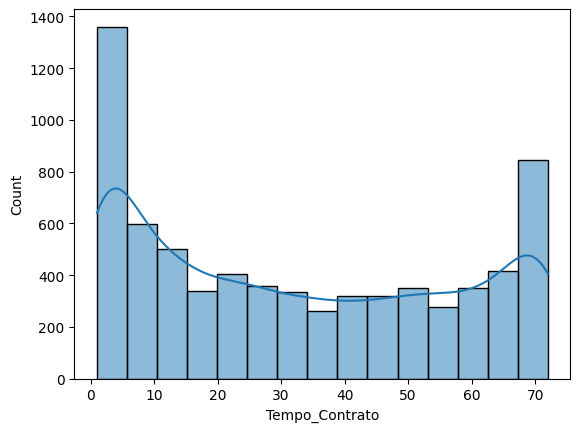

In [12]:
sns.histplot(df['Tempo_Contrato'], kde=True)

In [13]:
# Verificação das colunas contínuas:
for col in col_numericas_continuas:
  print(f'{col}: Min:{df[col].min()} - Media:{df[col].mean()} - Max:{df[col].max()}')

Conta_Mensal: Min:18.25 - Media:64.79820819112628 - Max:118.75
Conta_Total: Min:18.8 - Media:2283.3004408418656 - Max:8684.8
Conta_Diarias: Min:0.6083333333333333 - Media:2.1599402730375425 - Max:3.9583333333333335


<Axes: xlabel='Conta_Diarias', ylabel='Count'>

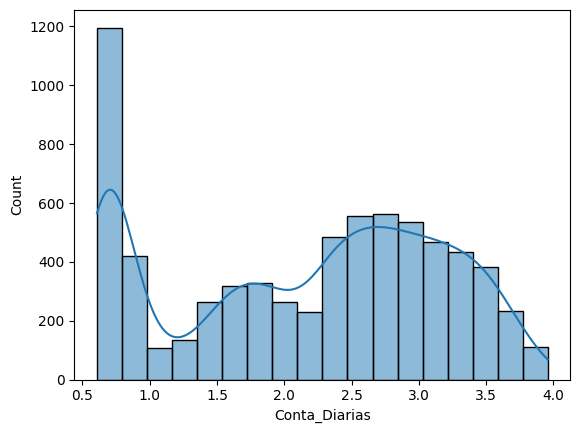

In [14]:
sns.histplot(df['Conta_Diarias'], kde=True)


In [15]:
# Verificação das colunas categoricas:
for col in col_categoricas:
  print(f'{col}: {df[col].unique()}')
  print('--------------------------------')

Genero: ['Feminino', 'Masculino']
Categories (2, object): ['Feminino', 'Masculino']
--------------------------------
Servico_Internet: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
--------------------------------
Tipo_Contrato: ['One year', 'Month-to-month', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year']
--------------------------------
Forma_Pagto: ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']
Categories (4, object): ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check',
                         'Mailed check']
--------------------------------


In [16]:
# Tratar a coluna Forma_Pagto
df['Forma_Pagto'] = df['Forma_Pagto'].str.replace(' (automatic)', '')
df['Forma_Pagto'].unique()

array(['Mailed check', 'Electronic check', 'Credit card', 'Bank transfer'],
      dtype=object)

### Eliminar colunas desnecessárias:

In [17]:
col_remover = ['ID_Cliente','Conta_Mensal', 'Conta_Total']
for col in col_remover:
  try:
    colunas.remove(col)
    col_numericas.remove(col)
    col_numericas_binarias.remove(col)
    col_numericas_discretas.remove(col)
    col_numericas_continuas.remove(col)
  except:
    pass
df = df.drop(columns=col_remover, axis=1)

### Transformar colunas categoricas

In [18]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

In [19]:
col_categoricas

['Genero', 'Servico_Internet', 'Tipo_Contrato', 'Forma_Pagto']

In [20]:
one_hot = make_column_transformer((
    OneHotEncoder( handle_unknown= 'ignore', drop = 'if_binary'),
    col_categoricas),
    remainder='passthrough',
    sparse_threshold=0)

df_enc = one_hot.fit_transform(df)

In [21]:
one_hot.get_feature_names_out()

array(['onehotencoder__Genero_Masculino',
       'onehotencoder__Servico_Internet_DSL',
       'onehotencoder__Servico_Internet_Fiber optic',
       'onehotencoder__Servico_Internet_No',
       'onehotencoder__Tipo_Contrato_Month-to-month',
       'onehotencoder__Tipo_Contrato_One year',
       'onehotencoder__Tipo_Contrato_Two year',
       'onehotencoder__Forma_Pagto_Bank transfer',
       'onehotencoder__Forma_Pagto_Credit card',
       'onehotencoder__Forma_Pagto_Electronic check',
       'onehotencoder__Forma_Pagto_Mailed check', 'remainder__Churn',
       'remainder__Idoso', 'remainder__Casal', 'remainder__Dependentes',
       'remainder__Tempo_Contrato', 'remainder__Servico_Telefone',
       'remainder__Servico_MultiplasLinhas',
       'remainder__Opt_OnlineSecurity', 'remainder__Opt_OnlineBackup',
       'remainder__Opt_DeviceProtection', 'remainder__Opt_TechSupport',
       'remainder__Opt_StreamingTV', 'remainder__Opt_StreamingMovies',
       'remainder__FaturaOnline', 'remai

In [22]:
df_enc = pd.DataFrame(df_enc, columns=one_hot.get_feature_names_out()).copy()
df_enc

,onehotencoder__Genero_Masculino,onehotencoder__Servico_Internet_DSL,onehotencoder__Servico_Internet_Fiber optic,onehotencoder__Servico_Internet_No,onehotencoder__Tipo_Contrato_Month-to-month,onehotencoder__Tipo_Contrato_One year,onehotencoder__Tipo_Contrato_Two year,onehotencoder__Forma_Pagto_Bank transfer,onehotencoder__Forma_Pagto_Credit card,onehotencoder__Forma_Pagto_Electronic check,...,remainder__Servico_Telefone,remainder__Servico_MultiplasLinhas,remainder__Opt_OnlineSecurity,remainder__Opt_OnlineBackup,remainder__Opt_DeviceProtection,remainder__Opt_TechSupport,remainder__Opt_StreamingTV,remainder__Opt_StreamingMovies,remainder__FaturaOnline,remainder__Conta_Diarias
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.186667
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.996667
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.463333
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.266667
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.838333
7028,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.836667
7029,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.676667
7030,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.261667


### Normalizar colunas Numericas discretas e contínuas

In [23]:
col_numericas

['Idoso',
 'Casal',
 'Dependentes',
 'Tempo_Contrato',
 'Servico_Telefone',
 'Servico_MultiplasLinhas',
 'Opt_OnlineSecurity',
 'Opt_OnlineBackup',
 'Opt_DeviceProtection',
 'Opt_TechSupport',
 'Opt_StreamingTV',
 'Opt_StreamingMovies',
 'FaturaOnline',
 'Conta_Diarias']

In [24]:
df_enc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   onehotencoder__Genero_Masculino              7032 non-null   float64
 1   onehotencoder__Servico_Internet_DSL          7032 non-null   float64
 2   onehotencoder__Servico_Internet_Fiber optic  7032 non-null   float64
 3   onehotencoder__Servico_Internet_No           7032 non-null   float64
 4   onehotencoder__Tipo_Contrato_Month-to-month  7032 non-null   float64
 5   onehotencoder__Tipo_Contrato_One year        7032 non-null   float64
 6   onehotencoder__Tipo_Contrato_Two year        7032 non-null   float64
 7   onehotencoder__Forma_Pagto_Bank transfer     7032 non-null   float64
 8   onehotencoder__Forma_Pagto_Credit card       7032 non-null   float64
 9   onehotencoder__Forma_Pagto_Electronic check  7032 non-null   float64
 10  

In [25]:
col_normalizar = []
for col in col_numericas:
  if col not in col_numericas_binarias:
    col_normalizar.append('remainder__'+col)
col_normalizar

['remainder__Tempo_Contrato', 'remainder__Conta_Diarias']

In [26]:
for col in col_normalizar:
  df_enc[col] = MinMaxScaler().fit_transform(df_enc[[col]])


In [27]:
df_enc.head()

,onehotencoder__Genero_Masculino,onehotencoder__Servico_Internet_DSL,onehotencoder__Servico_Internet_Fiber optic,onehotencoder__Servico_Internet_No,onehotencoder__Tipo_Contrato_Month-to-month,onehotencoder__Tipo_Contrato_One year,onehotencoder__Tipo_Contrato_Two year,onehotencoder__Forma_Pagto_Bank transfer,onehotencoder__Forma_Pagto_Credit card,onehotencoder__Forma_Pagto_Electronic check,...,remainder__Servico_Telefone,remainder__Servico_MultiplasLinhas,remainder__Opt_OnlineSecurity,remainder__Opt_OnlineBackup,remainder__Opt_DeviceProtection,remainder__Opt_TechSupport,remainder__Opt_StreamingTV,remainder__Opt_StreamingMovies,remainder__FaturaOnline,remainder__Conta_Diarias
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.471144
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.414428
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.553731
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.793532
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.653234


<Axes: xlabel='remainder__Conta_Diarias', ylabel='Count'>

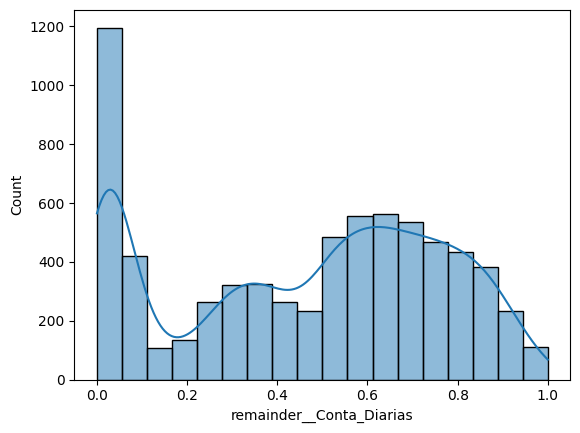

In [28]:
sns.histplot(df_enc['remainder__Conta_Diarias'], kde=True)

<Axes: xlabel='remainder__Tempo_Contrato', ylabel='Count'>

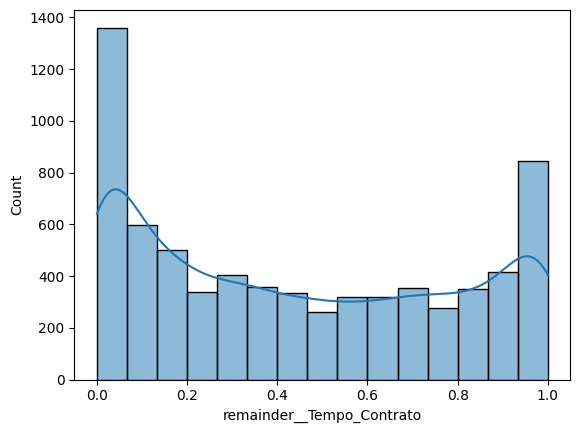

In [29]:
sns.histplot(df_enc['remainder__Tempo_Contrato'], kde=True)

### Balanceamento de Classes

<Axes: xlabel='remainder__Churn', ylabel='Count'>

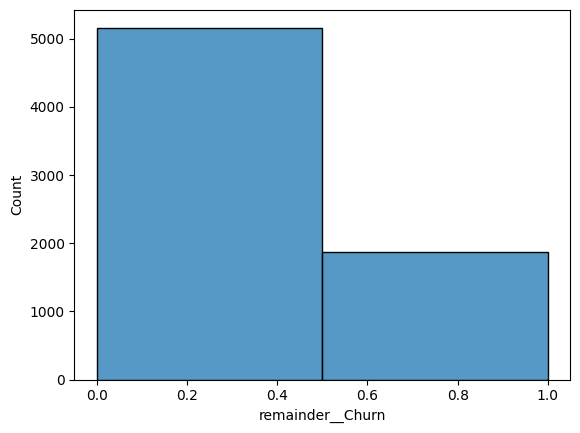

In [30]:
sns.histplot(df_enc['remainder__Churn'],bins=2)

In [31]:
coluna_alvo = 'remainder__Churn'

novas_colunas = [col for col in df_enc.columns if col != coluna_alvo] + [coluna_alvo]

# Reorganizar o DataFrame com a nova ordem de colunas
df_enc = df_enc[novas_colunas]

In [32]:
df_enc['remainder__Churn'].value_counts(normalize=True)

,proportion
remainder__Churn,
0.0,0.734215
1.0,0.265785


OBS: Devido ao desbalanceamento entre as classes, é interessante realizar um balanceamento de classes, antes da utilização dos modelos de classificação.

Vamos utilizar o SMOTE para gerar dados sintéticos de Churn, mas antes vamos analisar a correlação e seleção de Features


#📊 2. Realizar análise de correlação e seleção de variáveis.

In [33]:
corr = df_enc.corr()

corr.columns=corr.columns.str.replace('remainder__','')
corr.columns=corr.columns.str.replace('onehotencoder__','')
corr.index=corr.index.str.replace('remainder__','')
corr.index=corr.index.str.replace('onehotencoder__','')
corr.head()

,Genero_Masculino,Servico_Internet_DSL,Servico_Internet_Fiber optic,Servico_Internet_No,Tipo_Contrato_Month-to-month,Tipo_Contrato_One year,Tipo_Contrato_Two year,Forma_Pagto_Bank transfer,Forma_Pagto_Credit card,Forma_Pagto_Electronic check,...,Servico_MultiplasLinhas,Opt_OnlineSecurity,Opt_OnlineBackup,Opt_DeviceProtection,Opt_TechSupport,Opt_StreamingTV,Opt_StreamingMovies,FaturaOnline,Conta_Diarias,Churn
Genero_Masculino,1.000000,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,...,-0.008883,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,-0.011902,-0.013779,-0.008545
Servico_Internet_DSL,0.007584,1.000000,-0.641636,-0.379912,-0.065226,0.047300,0.030924,0.024760,0.051222,-0.104293,...,-0.200318,0.320343,0.156765,0.145150,0.312183,0.014973,0.025623,-0.063390,-0.161368,-0.124141
Servico_Internet_Fiber optic,-0.011189,-0.641636,1.000000,-0.465736,0.243014,-0.076809,-0.209965,-0.022779,-0.050552,0.335763,...,0.366420,-0.030506,0.165940,0.176356,-0.020299,0.329744,0.322457,0.326470,0.787195,0.307463
Servico_Internet_No,0.004745,-0.379912,-0.465736,1.000000,-0.217824,0.038061,0.217542,-0.001094,0.001870,-0.284608,...,-0.210794,-0.332799,-0.380990,-0.380151,-0.335695,-0.414951,-0.418450,-0.320592,-0.763191,-0.227578
Tipo_Contrato_Month-to-month,-0.003251,-0.065226,0.243014,-0.217824,1.000000,-0.570053,-0.621933,-0.180159,-0.204960,0.330879,...,-0.088558,-0.246844,-0.164393,-0.225988,-0.285491,-0.112550,-0.117867,0.168296,0.058933,0.404565


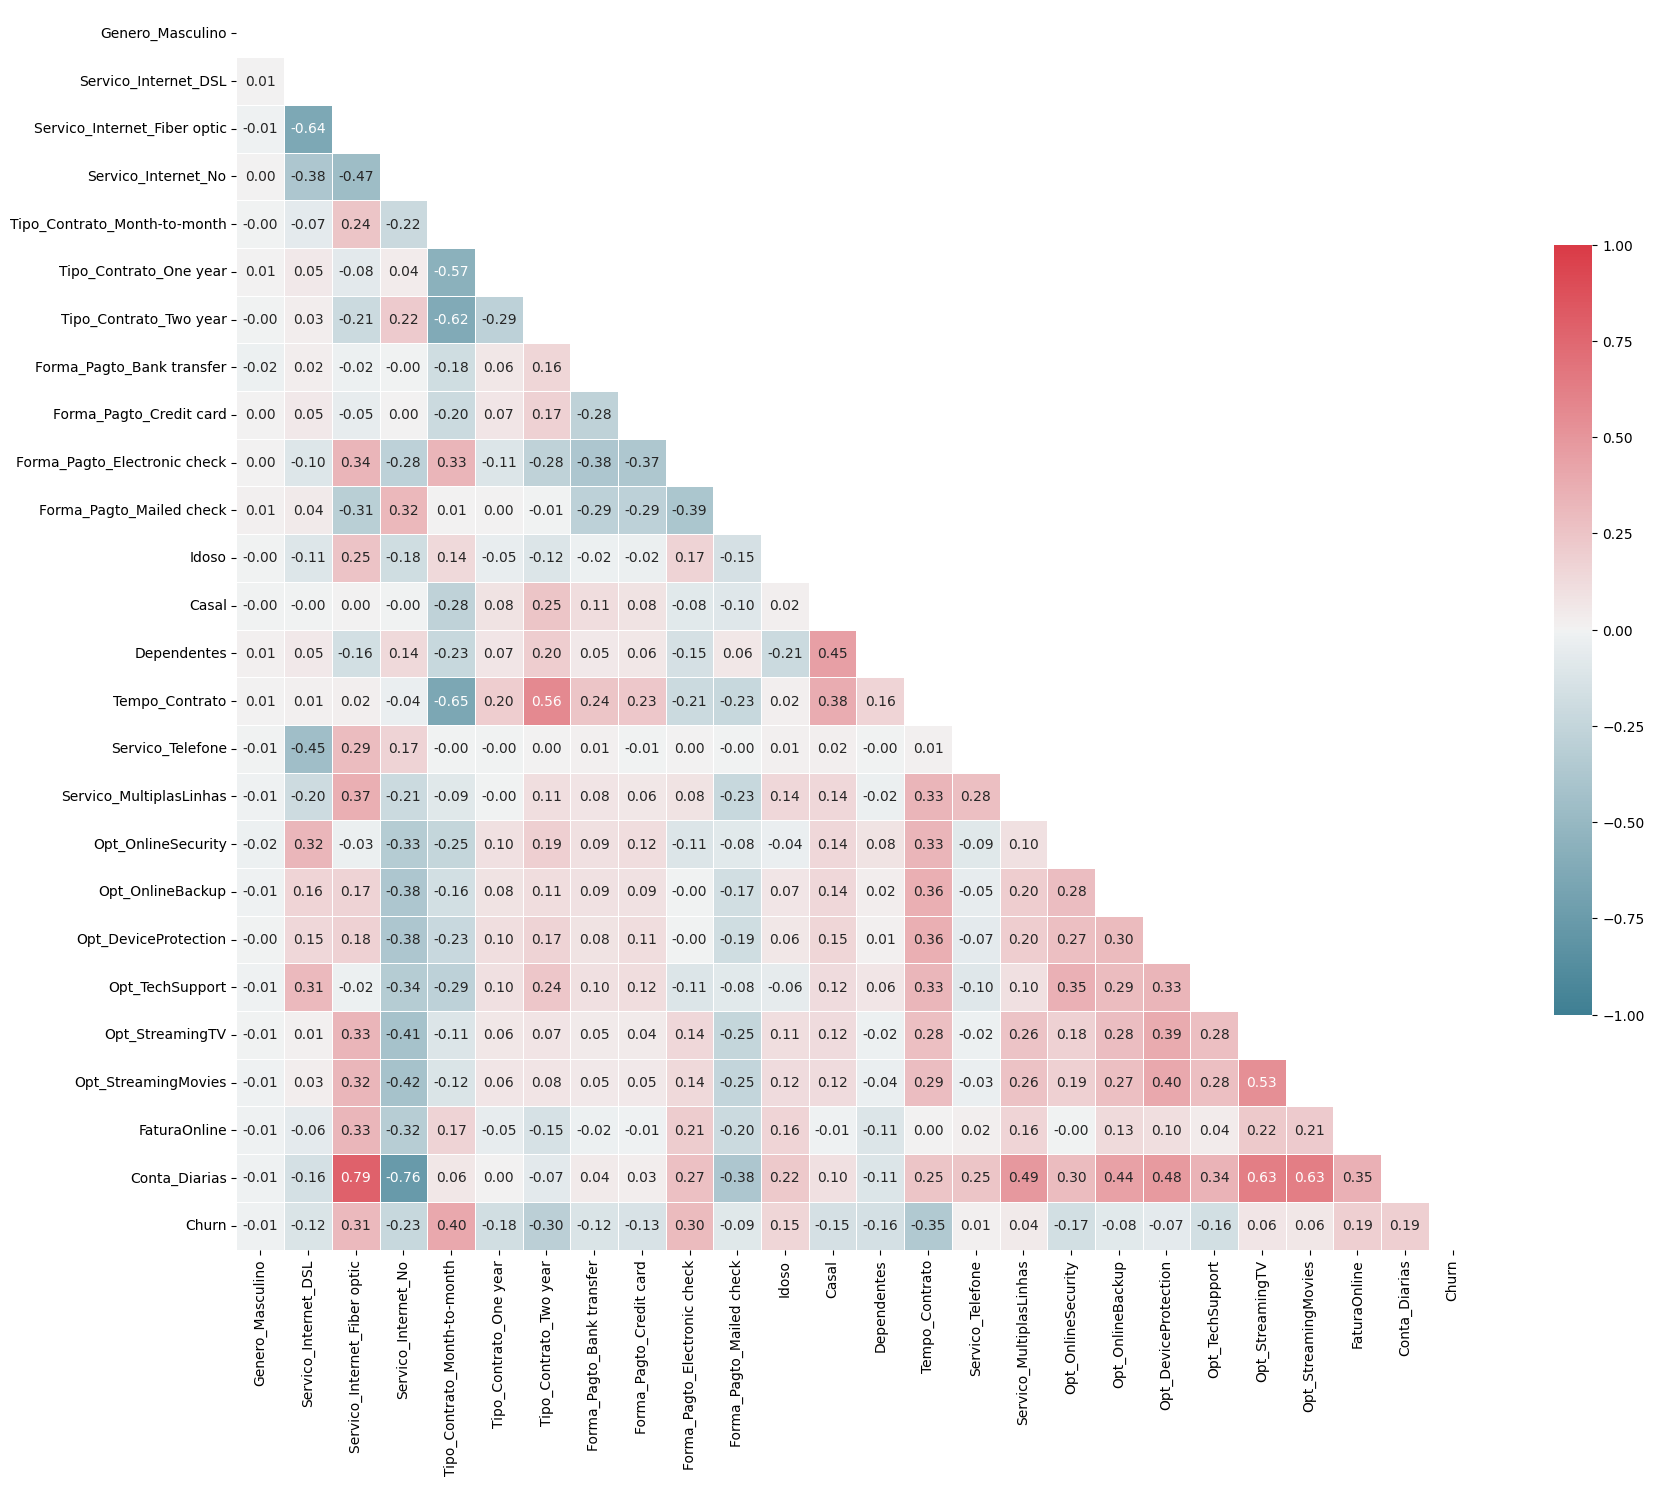

In [34]:
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

plt.show()

### Analisando a correlação das Features com a Coluna Alvo

In [35]:
correlacao_alvo = pd.DataFrame(corr[col_alvo])
correlacao_alvo = correlacao_alvo.sort_values(by=col_alvo, ascending=False)
correlacao_alvo_top10 = correlacao_alvo[1:11].T
correlacao_alvo_top10

,Tipo_Contrato_Month-to-month,Servico_Internet_Fiber optic,Forma_Pagto_Electronic check,Conta_Diarias,FaturaOnline,Idoso,Opt_StreamingTV,Opt_StreamingMovies,Servico_MultiplasLinhas,Servico_Telefone
Churn,0.404565,0.307463,0.301455,0.192858,0.191454,0.150541,0.063254,0.06086,0.040033,0.011691


### Gráfico com as 10 maiores correlações:

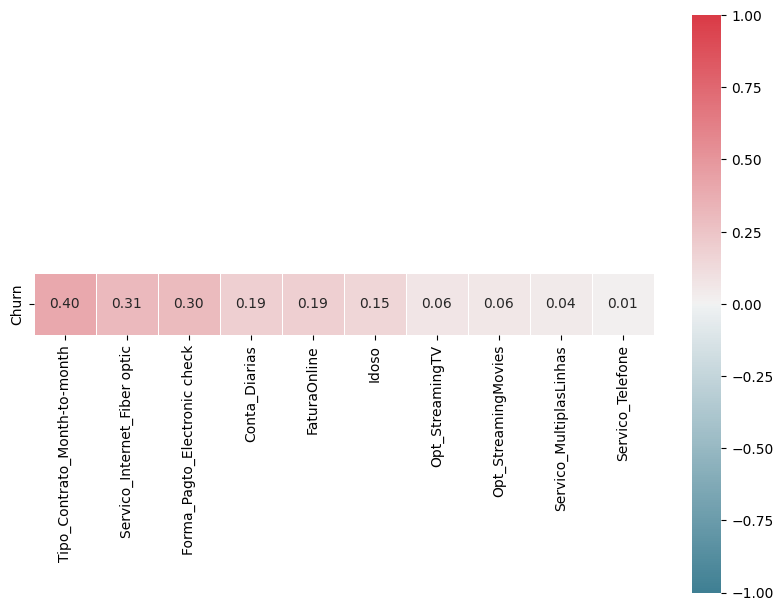

In [36]:
f, ax = plt.subplots(figsize=(10, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlacao_alvo_top10, cmap=cmap, vmax=1, vmin=-1, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

plt.show()

OBS: Não há Features fortemente relacionadas, pois já eliminamos isso anteriormente (Ex: Gasto_Total x Gasto_Mensal x Gasto_Diário e Tempo_Contrato x Gasto_Total) e também na remoção dos valores binários na etapa de Encoding.

### Salvar os Datasets para uso futuro

In [37]:
df_enc.to_parquet('data/ouro/Telecom_X_Encoded.parquet')

### Separando o dataframe em X, y (Feature Matrix and Target Vector)

In [38]:
x = df_enc.drop(columns=['remainder__'+col_alvo], axis=1)
y = df_enc['remainder__'+col_alvo]

print(x.shape)
print(y.shape)

(7032, 25)
(7032,)


In [39]:
df_x = pd.DataFrame(x)
df_x.to_parquet('data/ouro/X_Completo.parquet')
df_y = pd.DataFrame(y)
df_y.to_parquet('data/ouro/Y_Completo.parquet')


### Separando o dataframe em Treino, Teste e Validação

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, stratify=y_train_full, random_state=42)

print('               X      -     y')
print(f'Treino   : {x_train.shape} - {y_train.shape}')
print(f'Validação: {x_val.shape}  - {y_val.shape}')
print(f'Teste    : {x_test.shape}  - {y_test.shape}')


               X      -     y
Treino   : (4482, 25) - (4482,)
Validação: (1495, 25)  - (1495,)
Teste    : (1055, 25)  - (1055,)


# OPCIONAL: Testes com Balanceamento e seleção de Features em modelos

**O balanceamento deve ser realizado apenas nos dados de Treino!** Evita-se utilizar o balanceamento antes de separar os dados de teste e validação para evitar vazamento de dados, ou seja, validar o modelo com dados não reais.


## Realizar o balanceamento com SMOTEENN


In [42]:
y.value_counts(normalize=True)

,proportion
remainder__Churn,
0.0,0.734215
1.0,0.265785


In [43]:
y_train.value_counts(normalize=True)

,proportion
remainder__Churn,
0.0,0.734047
1.0,0.265953


In [44]:
from imblearn.combine import SMOTEENN

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score, precision_recall_curve


In [45]:
sample = SMOTEENN(random_state=123,sampling_strategy=1.0)
x_train_bal, y_train_bal = sample.fit_resample(x_train,y_train)

y_train_bal.value_counts(normalize=True)

,proportion
remainder__Churn,
1.0,0.553808
0.0,0.446192


## Testando alguns modelos para verificar Features relevantes

In [46]:
from sklearn.tree import DecisionTreeClassifier

              precision    recall  f1-score   support

         0.0       0.94      0.56      0.70       775
         1.0       0.42      0.89      0.57       280

    accuracy                           0.65      1055
   macro avg       0.68      0.73      0.64      1055
weighted avg       0.80      0.65      0.67      1055



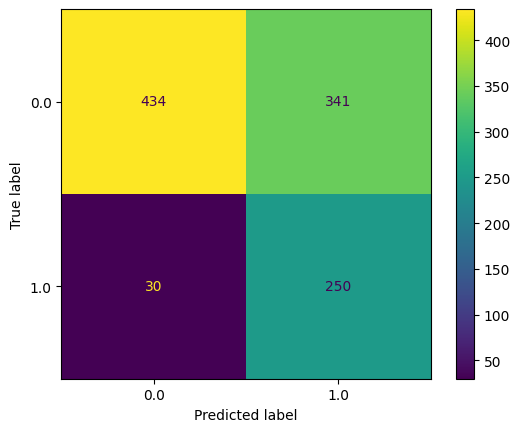

In [47]:
# Testando com uma Árvore de decisão

modelo_tree = DecisionTreeClassifier(max_depth = 3)

modelo_tree.fit(x_train_bal, y_train_bal)
y_previsto_tree = modelo_tree.predict(x_test)

print(classification_report(y_test, y_previsto_tree))

ConfusionMatrixDisplay.from_predictions(y_test, y_previsto_tree);



In [48]:
print(f'Acurácia no conjunto de treino : {modelo_tree.score(x_train, y_train)*100:.4f}%')
print(f'Acurácia no conjunto de valid  : {modelo_tree.score(x_val, y_val)*100:.4f}%')

Acurácia no conjunto de treino : 65.5065%
Acurácia no conjunto de valid  : 65.0836%


OBS: Devido à baixa acurácia do modelo Árvore, Vamos tentar o Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
modelo_rf = RandomForestClassifier(max_depth = 3)
modelo_rf.fit(x_train_bal, y_train_bal)
print(f'Acurácia no conjunto de treino : {modelo_rf.score(x_train_bal, y_train_bal)*100:.4f}%')
print(f'Acurácia no conjunto de valid  : {modelo_rf.score(x_val, y_val)*100:.4f}%')

Acurácia no conjunto de treino : 90.8365%
Acurácia no conjunto de valid  : 67.8261%


              precision    recall  f1-score   support

         0.0       0.93      0.59      0.72       775
         1.0       0.44      0.87      0.58       280

    accuracy                           0.67      1055
   macro avg       0.68      0.73      0.65      1055
weighted avg       0.80      0.67      0.69      1055



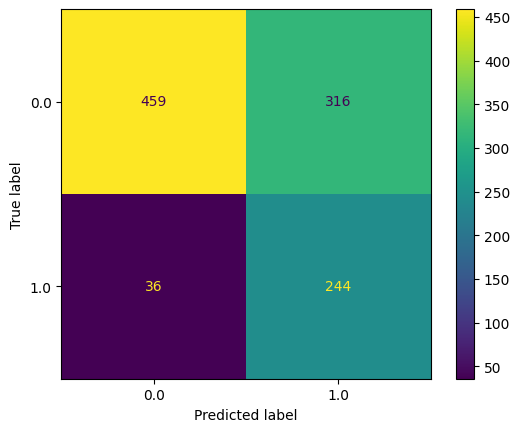

In [51]:
y_previsto_rf = modelo_rf.predict(x_test)

print(classification_report(y_test, y_previsto_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_previsto_rf);


## Função para cálculo de métricas

In [52]:
def calcular_metricas_classificacao(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metricas = {
        'Acurácia': round(accuracy, 4),
        'Precisão': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4)
    }

    return metricas

## Feature Engineer - Seleção de recursos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


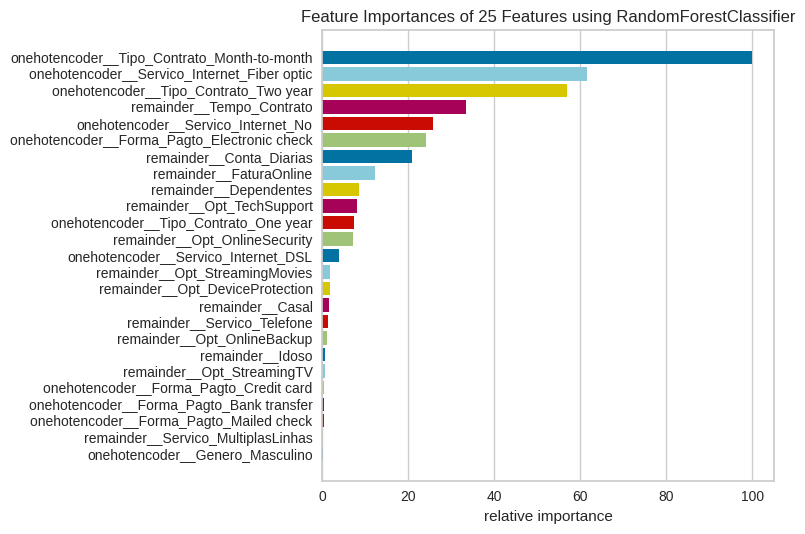

<Axes: title={'center': 'Feature Importances of 25 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [53]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(modelo_rf)
viz.fit(x_train_bal, y_train_bal)
viz.show()

In [54]:
modelo_rf.feature_importances_


array([0.00040852, 0.00994095, 0.16222448, 0.06761165, 0.26358488,
       0.01920648, 0.15006272, 0.00082428, 0.0010821 , 0.06338298,
       0.00077981, 0.00185117, 0.00436713, 0.02227754, 0.08774311,
       0.00340191, 0.00049588, 0.01854788, 0.00294514, 0.00456834,
       0.02122975, 0.00147119, 0.00459797, 0.03220025, 0.05519389])

Não mostrar a importância relativa e apenas as mais importantes

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


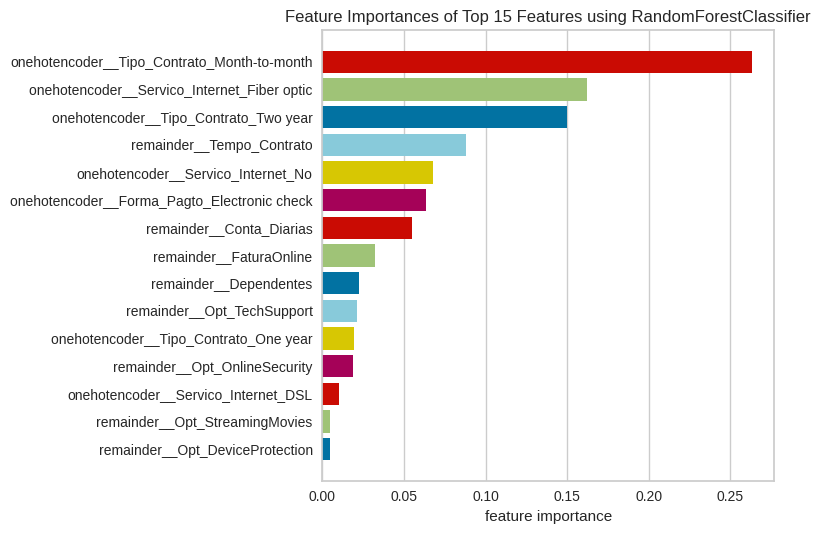

<Axes: title={'center': 'Feature Importances of Top 15 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [55]:
viz = FeatureImportances(modelo_rf, relative=False, topn=15)
viz.fit(x_train_bal, y_train_bal)
viz.show()


In [56]:
importances = modelo_rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x_train_bal.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

,feature,importance
4,onehotencoder__Tipo_Contrato_Month-to-month,0.263585
2,onehotencoder__Servico_Internet_Fiber optic,0.162224
6,onehotencoder__Tipo_Contrato_Two year,0.150063
14,remainder__Tempo_Contrato,0.087743
3,onehotencoder__Servico_Internet_No,0.067612
9,onehotencoder__Forma_Pagto_Electronic check,0.063383
24,remainder__Conta_Diarias,0.055194
23,remainder__FaturaOnline,0.032200
13,remainder__Dependentes,0.022278
20,remainder__Opt_TechSupport,0.021230


In [57]:
results_df = pd.DataFrame(index=['Acurácia','Precisão','Recall','F1 Score'])

model_selected_features = RandomForestClassifier(max_depth=3, random_state=42)

for count in [1, 5, 10, 15, 20, 20, 25]:
  selected_features = feature_importances['feature'].values[:count]

  x_train_selected = x_train_bal[selected_features]
  x_test_selected = x_test[selected_features]

  model_selected_features.fit(x_train_selected, y_train_bal)
  y_pred_selected = model_selected_features.predict(x_test_selected)
  metricas = calcular_metricas_classificacao(y_test, y_pred_selected)
  results_df[f'top_{count}'] = list(metricas.values())

results_df


,top_1,top_5,top_10,top_15,top_20,top_25
Acurácia,0.6408,0.6502,0.6701,0.6701,0.6758,0.6701
Precisão,0.4160,0.4244,0.4386,0.4375,0.4428,0.4386
Recall,0.8750,0.8929,0.8679,0.8500,0.8571,0.8679
F1 Score,0.5639,0.5754,0.5827,0.5777,0.5839,0.5827


In [58]:
results_df = pd.DataFrame(index=['Acurácia','Precisão','Recall','F1 Score'])

model_selected_features = RandomForestClassifier(max_depth=3, random_state=42)

for count in range(4,16):
  selected_features = feature_importances['feature'].values[:count]

  x_train_selected = x_train_bal[selected_features]
  x_test_selected = x_test[selected_features]

  model_selected_features.fit(x_train_selected, y_train_bal)
  y_pred_selected = model_selected_features.predict(x_test_selected)
  metricas = calcular_metricas_classificacao(y_test, y_pred_selected)
  results_df[f'top_{count}'] = list(metricas.values())

results_df

,top_4,top_5,top_6,top_7,top_8,top_9,top_10,top_11,top_12,top_13,top_14,top_15
Acurácia,0.6057,0.6502,0.6787,0.6654,0.6626,0.6616,0.6701,0.6701,0.6730,0.6673,0.6711,0.6701
Precisão,0.3973,0.4244,0.4455,0.4356,0.4336,0.4328,0.4386,0.4382,0.4408,0.4365,0.4396,0.4375
Recall,0.9393,0.8929,0.8607,0.8821,0.8857,0.8857,0.8679,0.8607,0.8643,0.8714,0.8714,0.8500
F1 Score,0.5584,0.5754,0.5871,0.5832,0.5822,0.5815,0.5827,0.5807,0.5838,0.5816,0.5844,0.5777


OBS: Podemos observar que utilizando 12 Features conseguimos um F1-Score (que combina Precisão e Recall) melhor do que quando utilizamos mais Features, com boa Acurácia, então iremos limitar nosso treinamento em 12 Features

In [59]:
## vamos deixar essa decisão para a próxima etapa, realizando a seleção de features em cada modelo dentro de um pipeline
## NÃO VAI EXECUTAR ESSE TRECHO
if 1==1:
  selected_features = feature_importances['feature'].values[:12]

  x_selected_features = x[selected_features]

  x_train_full, x_test, y_train_full, y_test = train_test_split(x_selected_features, y, test_size=0.15, stratify=y, random_state=42)
  x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, stratify=y_train_full, random_state=42)

  sample = SMOTEENN(random_state=42,sampling_strategy=1.0)
  x_train, y_train = sample.fit_resample(x_train,y_train)

  print(y_train.value_counts(normalize=True))
  print('--------------------------------------------')
  print('               X      -     Y')
  print(f'Treino   : {x_train.shape} - {y_train.shape}')
  print(f'Validação: {x_val.shape}  - {y_val.shape}')
  print(f'Teste    : {x_test.shape}  - {y_test.shape}')


remainder__Churn
0.0    0.503603
1.0    0.496397
Name: proportion, dtype: float64
--------------------------------------------
               X      -     Y
Treino   : (3886, 12) - (3886,)
Validação: (1495, 12)  - (1495,)
Teste    : (1055, 12)  - (1055,)


#🔧 3. Treinar Modelos de classificação.


In [60]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import f1_score, precision_score, recall_score

In [61]:
models = {
    'Random Forest': RandomForestClassifier(max_depth=5,random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

In [63]:
results = []
for model_name, model in models.items():
    pipeline = Pipeline([
        ('smoteenn', SMOTEENN(sampling_strategy=1.0, random_state=42)),
        ('feature_selection', SelectKBest(score_func=f_classif, k=12)),
        ('classifier', model)
    ])

    # Treinar
    pipeline.fit(x_train, y_train)

    # Avaliar no conjunto de validação

    y_val_pred = pipeline.predict(x_val)
    acc_val = accuracy_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    recall_val = recall_score(y_val, y_val_pred)

    # Avaliar no conjunto de teste
    y_test_pred = pipeline.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results.append({
        'Modelo': model_name,
        'Acurácia (Validação)': acc_val,
        'F1-Score (Validação)': f1_val,
        'Precisão (Validação)': precision_val,
        'Recall (Validação)': recall_val,
        'Acurácia (Teste)': acc_test,
        'F1-Score (Teste)': f1_test,
        'Precisão (Teste)': precision_test,
        'Recall (Teste)': recall_test
    })
    print(f"\nModelo: {model_name}")
    print(f"Acurácia (Validação): {acc_val:.4f}")
    print(f"F1-Score (Validação): {f1_val:.4f}")
    print(f"Precisão (Validação): {precision_val:.4f}")
    print(f"Recall (Validação): {recall_val:.4f}")
    print(f"Acurácia (Teste): {acc_test:.4f}")
    print(f"F1-Score (Teste): {f1_test:.4f}")
    print(f"Precisão (Teste): {precision_test:.4f}")
    print(f"Recall (Teste): {recall_test:.4f}")

# Resumo em DataFrame
results_df = pd.DataFrame(results)



Modelo: Random Forest
Acurácia (Validação): 0.7478
F1-Score (Validação): 0.6343
Precisão (Validação): 0.5158
Recall (Validação): 0.8237
Acurácia (Teste): 0.7223
F1-Score (Teste): 0.6109
Precisão (Teste): 0.4863
Recall (Teste): 0.8214

Modelo: SVM
Acurácia (Validação): 0.7391
F1-Score (Validação): 0.6116
Precisão (Validação): 0.5058
Recall (Validação): 0.7733
Acurácia (Teste): 0.7175
F1-Score (Teste): 0.5962
Precisão (Teste): 0.4803
Recall (Teste): 0.7857

Modelo: Logistic Regression
Acurácia (Validação): 0.7338
F1-Score (Validação): 0.6202
Precisão (Validação): 0.4992
Recall (Validação): 0.8186
Acurácia (Teste): 0.7251
F1-Score (Teste): 0.6070
Precisão (Teste): 0.4891
Recall (Teste): 0.8000

Resumo dos Resultados:
                Modelo  Acurácia (Validação)  F1-Score (Validação)  \
0        Random Forest              0.747826              0.634336   
1                  SVM              0.739130              0.611554   
2  Logistic Regression              0.733779              0.62022

In [64]:
print("Resumo dos Resultados:")
results_df


Resumo dos Resultados:


,Modelo,Acurácia (Validação),F1-Score (Validação),Precisão (Validação),Recall (Validação),Acurácia (Teste),F1-Score (Teste),Precisão (Teste),Recall (Teste)
0,Random Forest,0.747826,0.634336,0.515773,0.823678,0.722275,0.610890,0.486258,0.821429
1,SVM,0.739130,0.611554,0.505766,0.773300,0.717536,0.596206,0.480349,0.785714
2,Logistic Regression,0.733779,0.620229,0.499232,0.818640,0.725118,0.607046,0.489083,0.800000


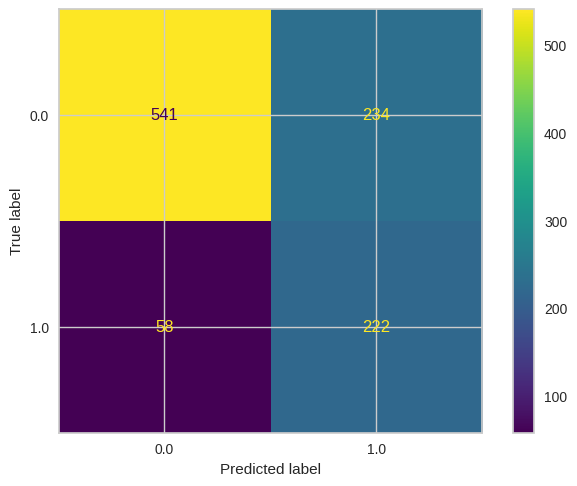

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred);

### Aprimorando os modelos com técnicas de otimização de hiperparâmetros

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
model_params = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [2, 3, 5, 7],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['rbf', 'linear']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['liblinear', 'lbfgs']
        }
    }
}

In [67]:
roc_data = {}
pr_data = {}
confusion_matrices = {}

In [68]:
results = []
for model_name, mp in model_params.items():
    # Pipeline com SMOTEENN, seleção de features e modelo
    pipeline = Pipeline([
        ('smoteenn', SMOTEENN(sampling_strategy=1.0, random_state=42)),
        ('feature_selection', SelectKBest(score_func=f_classif, k=12)),
        ('classifier', mp['model'])
    ])

    # Grid Search com validação cruzada (5 folds) no conjunto de treinamento
    grid_search = GridSearchCV(
        pipeline,
        mp['params'],
        cv=5,  # 5-fold CV
        scoring='f1',  # Métrica principal: F1-score
        n_jobs=-1  # Paralelizar para acelerar
    )
    grid_search.fit(x_train, y_train)

    # Melhor modelo e parâmetros encontrados
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_  # F1-score médio na CV

    # Avaliar no conjunto de validação
    y_val_pred = best_model.predict(x_val)
    acc_val = accuracy_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    recall_val = recall_score(y_val, y_val_pred)

    # Avaliar no conjunto de teste
    y_test_pred = best_model.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results.append({
        'Modelo': model_name,
        'Melhores Parâmetros': best_params,
        'F1-Score (CV Treinamento)': best_score,
        'F1-Score (Validação)': f1_val,
        'Acurácia (Validação)': acc_val,
        'Precisão (Validação)': precision_val,
        'Recall (Validação)': recall_val,
        'Acurácia (Teste)': acc_test,
        'F1-Score (Teste)': f1_test,
        'Precisão (Teste)': precision_test,
        'Recall (Teste)': recall_test
    })
    print(f"\nModelo: {model_name}")
    print(f"Melhores Parâmetros: {best_params}")
    print(f"F1-Score (CV Treinamento): {best_score:.4f}")

# Resumo em DataFrame
results_df = pd.DataFrame(results)


Modelo: Random Forest
Melhores Parâmetros: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
F1-Score (CV Treinamento): 0.9501

Modelo: SVM
Melhores Parâmetros: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
F1-Score (CV Treinamento): 0.9382

Modelo: Logistic Regression
Melhores Parâmetros: {'classifier__C': 10, 'classifier__solver': 'liblinear'}
F1-Score (CV Treinamento): 0.9207


In [69]:
print("Resumo dos Resultados:")
results_df

Resumo dos Resultados:


,Modelo,Melhores Parâmetros,F1-Score (CV Treinamento),F1-Score (Validação),Acurácia (Validação),Precisão (Validação),Recall (Validação),Acurácia (Teste),F1-Score (Teste),Precisão (Teste),Recall (Teste)
0,Random Forest,"{'classifier__max_depth': 10, 'classifier__min...",0.950061,0.644831,0.767893,0.543103,0.793451,0.743128,0.617772,0.510490,0.782143
1,SVM,"{'classifier__C': 10, 'classifier__kernel': 'r...",0.938199,0.611670,0.741806,0.509213,0.765743,0.725118,0.601648,0.488839,0.782143
2,Logistic Regression,"{'classifier__C': 10, 'classifier__solver': 'l...",0.920727,0.626204,0.740468,0.507020,0.818640,0.723223,0.603261,0.486842,0.792857


In [72]:
# Selecionar o melhor modelo geral (baseado no F1-score no teste)
best_overall = results_df.loc[results_df['F1-Score (Teste)'].idxmax()]
print(f"\nMelhor Combinação Geral: {best_overall['Modelo']} com Parâmetros {best_overall['Melhores Parâmetros']}")
print(f"F1-Score no Teste: {best_overall['F1-Score (Teste)']:.4f}")


Melhor Combinação Geral: Random Forest com Parâmetros {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
F1-Score no Teste: 0.6178


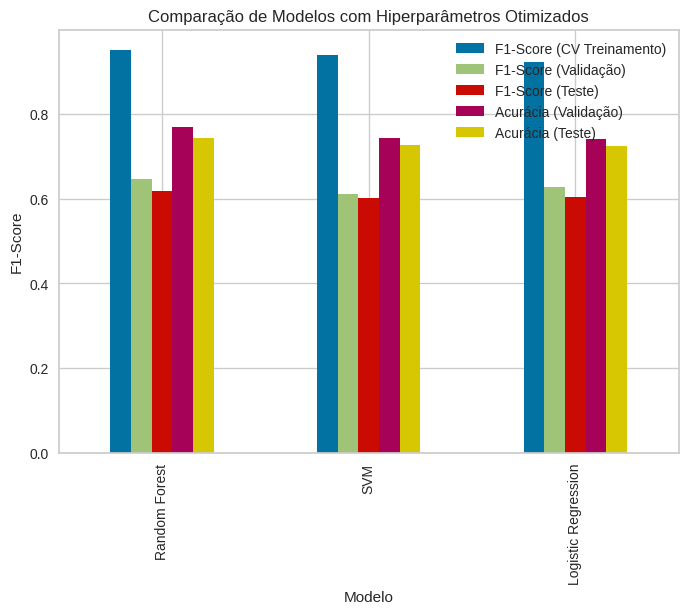

In [74]:

results_df.plot(x='Modelo', y=['F1-Score (CV Treinamento)', 'F1-Score (Validação)', 'F1-Score (Teste)', 'Acurácia (Validação)', 'Acurácia (Teste)'], kind='bar')
plt.title('Comparação de Modelos com Hiperparâmetros Otimizados')
plt.ylabel('F1-Score')
plt.show()

## Linha de Base - DummyRegressor

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(x_train_bal, y_train_bal)


In [ ]:
#dummy_regr.score(x_test, y_test)

In [ ]:
y_pred_dummy = dummy.predict(x_test)
print(calcular_metricas_classificacao(y_test, y_pred_dummy))
df_result = pd.DataFrame(calcular_metricas_classificacao(y_test, y_pred_dummy), index=['DummyRegressor'])

### Avaliando

#📈 4. Avaliar o desempenho dos modelos com métricas.

In [ ]:

from sklearn.metrics import f1_score, roc_curve, precision_recall_curve, roc_auc_score, auc, confusion_matrix


# Dicionário de modelos e grids de parâmetros
model_params = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=5),
        'params': {
            'classifier__max_depth': [1, 2, 3, 5, 7],  # Exemplo: valores para max_depth
            'classifier__n_estimators': [50, 100, 200],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['rbf', 'linear']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['liblinear', 'lbfgs']
        }
    }
}

# Armazenar resultados, dados para curvas e matrizes de confusão
results = []
roc_data = {}
pr_data = {}
confusion_matrices = {}

In [ ]:


for model_name, mp in model_params.items():
    # Pipeline com SMOTEENN, seleção de features e modelo
    pipeline = Pipeline([
        ('smoteenn', SMOTEENN(sampling_strategy=1.0, random_state=42)),
        ('feature_selection', SelectKBest(score_func=f_classif, k=12)),
        ('classifier', mp['model'])
    ])

    # Grid Search com validação cruzada (5 folds) no conjunto de treinamento
    grid_search = GridSearchCV(
        pipeline,
        mp['params'],
        cv=5,  # 5-fold CV
        scoring='f1',  # Métrica principal: F1-score
        n_jobs=-1  # Paralelizar para acelerar
    )
    grid_search.fit(x_train, y_train)

    # Melhor modelo e parâmetros encontrados
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_  # F1-score médio na CV

    # Avaliar no conjunto de validação
    y_val_pred = best_model.predict(x_val)
    f1_val = f1_score(y_val, y_val_pred)

    # Avaliar no conjunto de teste
    y_test_pred = best_model.predict(x_test)
    f1_test = f1_score(y_test, y_test_pred)

    # Previsões de probabilidade no conjunto de teste para curvas
    y_test_proba = best_model.predict_proba(x_test)[:, 1]

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    roc_data[model_name] = {'fpr': fpr.tolist(), 'tpr': tpr.tolist(), 'auc': roc_auc}

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    pr_auc = auc(recall, precision)
    pr_data[model_name] = {'recall': recall.tolist(), 'precision': precision.tolist(), 'auc': pr_auc}

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrices[model_name] = cm.tolist()

    results.append({
        'Modelo': model_name,
        'Melhores Parâmetros': best_params,
        'F1-Score (CV Treinamento)': best_score,
        'F1-Score (Validação)': f1_val,
        'F1-Score (Teste)': f1_test
    })
    print(f"\nModelo: {model_name}")
    print(f"Melhores Parâmetros: {best_params}")
    print(f"F1-Score (CV Treinamento): {best_score:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")
    print(f"Matriz de Confusão:\n{cm}")

# Resumo em DataFrame
results_df = pd.DataFrame(results)
print("\nResumo dos Resultados:")
print(results_df)

# Selecionar o melhor modelo geral (baseado no F1-score no teste)
best_overall = results_df.loc[results_df['F1-Score (Teste)'].idxmax()]
print(f"\nMelhor Combinação Geral: {best_overall['Modelo']} com Parâmetros {best_overall['Melhores Parâmetros']}")
print(f"F1-Score no Teste: {best_overall['F1-Score (Teste)']:.4f}")


In [ ]:
# Gráfico 1: Curvas ROC (separado)
plt.figure(figsize=(8, 6))
for model_name, data in roc_data.items():
    sns.lineplot(x=data['fpr'], y=data['tpr'], label=f"{model_name} (AUC={data['auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.title('Curvas ROC dos Melhores Modelos (após GridSearch)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()

In [ ]:
# Gráfico 2: Curvas Precision-Recall (separado)
plt.figure(figsize=(8, 6))
for model_name, data in pr_data.items():
    sns.lineplot(x=data['recall'], y=data['precision'], label=f"{model_name} (AUC={data['auc']:.2f})")
plt.title('Curvas Precision-Recall dos Melhores Modelos (após GridSearch)')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.legend()
plt.show()

In [ ]:
# Gráficos 3: Matrizes de Confusão (uma para cada modelo, separadas)
for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0.0', '1.0'], yticklabels=['0.0', '1.0'])
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

Testar mais variações de max_depth e do número de features selecionadas (k na seleção de features com SelectKBest) para o modelo Random Forest, que foi identificado como o melhor no seu caso, vamos usar GridSearchCV para explorar um grid expandido de hiperparâmetros. Essa célula será compatível com o ambiente do Google Colab e usará o mesmo pipeline com SMOTEENN e SelectKBest, mantendo a consistência com o código anterior. A ideia é:

Expandir os valores de max_depth (e.g., adicionando valores menores e maiores para capturar diferentes níveis de complexidade).
Testar diferentes números de features (k) na seleção de features.
Avaliar o desempenho com métricas como F1-score, ROC-AUC, e PR-AUC, além de gerar curvas ROC, Precision-Recall e matriz de confusão com Seaborn, como solicitado.

A célula será independente, mas usará os mesmos dados (X_train, y_train, X_val, y_val, X_test, y_test) do código anterior. Também manterei a estrutura para exibir resultados e gráficos no Jupyter Notebook no Google Colab.

In [ ]:
# Pipeline com SMOTEENN, seleção de features e Random Forest
pipeline = Pipeline([
    ('smoteenn', SMOTEENN(sampling_strategy=1.0, random_state=123)),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', RandomForestClassifier(random_state=5))
])

# Grid de parâmetros expandido
param_grid = {
    'classifier__max_depth': [1, 2, 3, 4, 5, 6, 8],  # Mais variações de max_depth
    'classifier__n_estimators': [100, 200, 300],  # Mantendo valores razoáveis
    'classifier__min_samples_split': [2, 5, 10],
    'feature_selection__k': [2, 5, 7, 9, 10, 11, 12]  # Diferentes números de features
}

# Grid Search com validação cruzada (5 folds)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(x_train, y_train)

# Melhor modelo e parâmetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Avaliar no conjunto de validação
y_val_pred = best_model.predict(x_val)
f1_val = f1_score(y_val, y_val_pred)

# Avaliar no conjunto de teste
y_test_pred = best_model.predict(x_test)
f1_test = f1_score(y_test, y_test_pred)

# Previsões de probabilidade para curvas
y_test_proba = best_model.predict_proba(x_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recall, precision)

# Matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)

In [ ]:
# Exibir resultados
print("\nResultados do Random Forest com GridSearch Expandido:")
print(f"Melhores Parâmetros: {best_params}")
print(f"F1-Score (CV Treinamento): {best_score:.4f}")
print(f"F1-Score (Validação): {f1_val:.4f}")
print(f"F1-Score (Teste): {f1_test:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print(f"Matriz de Confusão:\n{cm}")

In [ ]:
# Gráfico 1: Curva ROC
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label=f"Random Forest (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.title('Curva ROC do Melhor Random Forest (após GridSearch Expandido)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()

In [ ]:
# Gráfico 2: Curva Precision-Recall
plt.figure(figsize=(8, 6))
sns.lineplot(x=recall, y=precision, label=f"Random Forest (AUC={pr_auc:.2f})")
plt.title('Curva Precision-Recall do Melhor Random Forest (após GridSearch Expandido)')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.legend()
plt.show()

In [ ]:
# Gráfico 3: Matriz de Confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0.0', '1.0'], yticklabels=['0.0', '1.0'])
plt.title('Matriz de Confusão - Random Forest (após GridSearch Expandido)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

#🔎 5. Interpretar os resultados, incluindo a importância das variáveis.

# 🎯 6. Conclusão:
criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

Uma análise descritiva mais detalhada será realizada no BD Star Schema, que será criado a seguir

#📄Relatorio Final

# Relatório Final - Análise de Evasão de Clientes Telecom X

## Introdução

Este relatório apresenta uma análise exploratória dos dados de clientes da Telecom X com o objetivo de identificar os fatores que contribuem para a evasão de clientes (Churn). A empresa busca entender o comportamento dos clientes que cancelam seus serviços para desenvolver estratégias eficazes de retenção.

## Limpeza e Tratamento de Dados

Os dados foram extraídos de uma fonte JSON e processados utilizando a arquitetura Medalhão, dividindo o trabalho em três camadas:

- **Camada Bronze:** Os dados brutos foram carregados diretamente do arquivo JSON.
- **Camada Prata:** Nesta camada, os dados foram limpos e transformados. As colunas com informações aninhadas em formato JSON foram normalizadas. Valores inconsistentes na coluna `Charges.Total` foram tratados, e a coluna foi convertida para o tipo numérico correto. Clientes com `tenure` igual a zero foram removidos, pois não forneciam informações relevantes para a análise de churn. Colunas binárias ('Yes'/'No' ou similares) foram convertidas para 1 e 0 para facilitar a análise numérica. Colunas categóricas como 'gender', 'Contract', 'PaymentMethod', e 'InternetService' foram convertidas para o tipo 'category' do pandas. Uma nova coluna `Contas_Diarias` foi criada calculando o gasto diário. As colunas foram traduzidas para o português e renomeadas para melhor compreensão.
- **Camada Ouro:** Os dados limpos e transformados da camada Prata foram carregados e estruturados em um esquema estrela utilizando DuckDB para facilitar a análise e consulta. Foram criadas as tabelas dim_clientes, dim_tipos_servicos, fato_servicos_clientes, dim_contratos e fato_gastos.

## Análise Exploratória de Dados (EDA)

Nesta seção, foram realizadas diversas análises para identificar padrões e tendências nos dados:

### Análise Descritiva

Foram apresentadas estatísticas descritivas gerais sobre o volume de clientes, taxa de churn, tempo de contrato e valores de contas mensais e totais.

### Contagem de Evasão por Variáveis Numéricas

A análise da distribuição de variáveis numéricas, como tempo de contrato e gastos, entre clientes evadidos e ativos, ajudou a identificar possíveis limiares ou padrões associados ao churn.

## Conclusões e Insights

Com base na análise exploratória, podemos destacar os seguintes insights:

- Clientes com contratos de menor duração (mês a mês) apresentam uma taxa de churn significativamente maior.
- Clientes que utilizam a forma de pagamento "Electronic check" têm uma maior proporção de churn.
- Clientes com Internet Fibra Óptica parecem ter uma taxa de churn maior em comparação com outros tipos de serviço de internet.
- A ausência de serviços opcionais como Online Security, Online Backup, Device Protection e Tech Support parece estar associada a uma maior probabilidade de churn.
- Clientes com maior tempo de contrato e maiores gastos totais tendem a apresentar menor taxa de churn.

## Recomendações

Com base nos insights obtidos, sugerimos as seguintes recomendações para a Telecom X:

- Desenvolver programas de fidelidade e incentivos para clientes com contratos de menor duração, visando a renovação para contratos mais longos.
- Investigar possíveis problemas ou insatisfações associadas à forma de pagamento "Electronic check" e oferecer alternativas ou melhorias no processo.
- Avaliar a qualidade do serviço de Internet Fibra Óptica e a satisfação dos clientes, buscando identificar e solucionar possíveis problemas que possam estar levando ao churn.
- Promover os serviços opcionais de segurança e suporte técnico para os clientes, destacando os benefícios e o valor agregado para reduzir a probabilidade de churn.
- Implementar estratégias de retenção direcionadas a clientes com menor tempo de contrato, oferecendo suporte proativo e benefícios exclusivos.

Essas recomendações podem servir como ponto de partida para a equipe de Data Science desenvolver modelos preditivos mais precisos e implementar estratégias de retenção mais eficazes.

# Análise de Evasão de Clientes (Churn) - Telecom X

## Introdução

Este projeto tem como objetivo analisar o fenômeno de evasão de clientes (Churn) na empresa Telecom X. O alto índice de cancelamentos representa um desafio significativo para a empresa, impactando diretamente a receita e o crescimento. Através da coleta, tratamento e análise exploratória dos dados, buscamos identificar os principais fatores que levam os clientes a cancelar seus serviços, fornecendo insights valiosos para a equipe de Data Science desenvolver modelos preditivos e estratégias de retenção eficazes.

## Detalhes do Projeto e Tecnologias Utilizadas

Este projeto seguiu a **Arquitetura Medalhão** para garantir a organização e a qualidade dos dados durante o processo de ETL (Extração, Transformação e Carga). A arquitetura é dividida em três camadas:

- **Camada Bronze:** Armazena os dados brutos, conforme recebidos da fonte.
- **Camada Prata:** Os dados são limpos, transformados e enriquecidos nesta camada.
- **Camada Ouro:** Os dados são refinados e otimizados para análise e tomada de decisões, estruturados em um esquema estrela.

As principais tecnologias e bibliotecas utilizadas neste projeto incluem:

- **Python:** Linguagem de programação principal.
- **Pandas:** Para manipulação e análise de dados.
- **NumPy:** Para operações numéricas.
- **Matplotlib e Seaborn:** Para visualização de dados.
- **Requests e JSON:** Para extração de dados da API.
- **OS:** Para manipulação de arquivos e diretórios.
- **DuckDB:** Utilizado como banco de dados analítico na camada Ouro para o esquema estrela.

## Limpeza e Tratamento de Dados

Os dados foram extraídos de uma fonte JSON e processados utilizando a arquitetura Medalhão, dividindo o trabalho em três camadas:

- **Camada Bronze:** Os dados brutos foram carregados diretamente do arquivo JSON.
- **Camada Prata:** Nesta camada, os dados foram limpos e transformados. As colunas com informações aninhadas em formato JSON foram normalizadas. Valores inconsistentes na coluna `Charges.Total` foram tratados, e a coluna foi convertida para o tipo numérico correto. Clientes com `tenure` igual a zero foram removidos, pois não forneciam informações relevantes para a análise de churn. Colunas binárias ('Yes'/'No' ou similares) foram convertidas para 1 e 0 para facilitar a análise numérica. Colunas categóricas como 'gender', 'Contract', 'PaymentMethod', e 'InternetService' foram convertidas para o tipo 'category' do pandas. Uma nova coluna `Contas_Diarias` foi criada calculando o gasto diário. As colunas foram traduzidas para o português e renomeadas para melhor compreensão.
- **Camada Ouro:** Os dados limpos e transformados da camada Prata foram carregados e estruturados em um esquema estrela utilizando DuckDB para facilitar a análise e consulta. Foram criadas as tabelas dim_clientes, dim_tipos_servicos, fato_servicos_clientes, dim_contratos e fato_gastos.

## Análise Exploratória de Dados (EDA)

Nesta seção, foram realizadas diversas análises para identificar padrões e tendências nos dados:

### Análise Descritiva

Foram apresentadas estatísticas descritivas gerais sobre o volume de clientes, taxa de churn, tempo de contrato e valores de contas mensais e totais.

### Análise de Perfil dos Clientes

Foram analisados os perfis dos clientes em relação a gênero, faixa etária (idoso/não idoso), estado civil (casal/solteiro) e dependentes.

### Análise de Gastos por Atributos dos Clientes

A análise dos gastos médios por diferentes atributos dos clientes revelou insights sobre o comportamento de consumo.

### Análise de Churn e Gastos por Atributos dos Contratos

A análise do churn e dos gastos em relação aos atributos dos contratos, como tipo de contrato, fatura online e forma de pagamento, forneceu informações sobre quais características contratuais estão mais associadas à evasão e aos gastos dos clientes.

### Análise de Churn por Atributos dos Serviços

A análise do churn em relação aos serviços contratados e opcionais ajudou a identificar quais serviços podem estar mais relacionados à evasão.

### Análise de Churn por Atributos dos Clientes

A análise do churn em relação aos atributos de perfil dos clientes (gênero, idade, estado civil, dependentes) ajudou a entender se certos grupos demográficos apresentam maior tendência a cancelar.

### Contagem de Evasão por Variáveis Numéricas

A análise da distribuição de variáveis numéricas, como tempo de contrato e gastos, entre clientes evadidos e ativos, ajudou a identificar possíveis limiares ou padrões associados ao churn.

## Conclusões e Insights

Com base na análise exploratória, podemos destacar os seguintes insights:

- Clientes com contratos de menor duração (mês a mês) apresentam uma taxa de churn significativamente maior.
- Clientes que utilizam a forma de pagamento "Electronic check" têm uma maior proporção de churn.
- Clientes com Internet Fibra Óptica parecem ter uma taxa de churn maior em comparação com outros tipos de serviço de internet.
- A ausência de serviços opcionais como Online Security, Online Backup, Device Protection e Tech Support parece estar associada a uma maior probabilidade de churn.
- Clientes com maior tempo de contrato e maiores gastos totais tendem a apresentar menor taxa de churn.

## Recomendações

Com base nos insights obtidos, sugerimos as seguintes recomendações para a Telecom X:

- Desenvolver programas de fidelidade e incentivos para clientes com contratos de menor duração, visando a renovação para contratos mais longos.
- Investigar possíveis problemas ou insatisfações associadas à forma de pagamento "Electronic check" e oferecer alternativas ou melhorias no processo.
- Avaliar a qualidade do serviço de Internet Fibra Óptica e a satisfação dos clientes, buscando identificar e solucionar possíveis problemas que possam estar levando ao churn.
- Promover os serviços opcionais de segurança e suporte técnico para os clientes, destacando os benefícios e o valor agregado para reduzir a probabilidade de churn.
- Implementar estratégias de retenção direcionadas a clientes com menor tempo de contrato, oferecendo suporte proativo e benefícios exclusivos.

Essas recomendações podem servir como ponto de partida para a equipe de Data Science desenvolver modelos preditivos mais precisos e implementar estratégias de retenção mais eficazes.

### Download dos arquivos gerados

In [ ]:
# Zip the data folder
!zip -r data.zip data

# Download the zip file
from google.colab import files
files.download('data.zip')